# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [7]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [8]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [9]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\User\Documents\Ma STIC\Ma STIC II\Traitement Automatique de Corpus\2023-2024\TDs\tac\tac_venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# Détail de la matrice
tfidf_vectors

<1000x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 591250 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [11]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429822
ecrire        0.290745
agence        0.287284
bilingue      0.195608
importante    0.172357
                ...   
er            0.000000
erreurs       0.000000
esp           0.000000
espagne       0.000000
♦             0.000000
Length: 2997, dtype: float64

In [27]:
tfidf_array = tfidf_vectors.toarray()

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [28]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [29]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [30]:
clusters = km_model.fit_predict(tfidf_vectors)

c:\Users\User\Documents\Ma STIC\Ma STIC II\Traitement Automatique de Corpus\2023-2024\TDs\tac\tac_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [32]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-12_01-00011.txt',
     'KB_JB838_1960-01-13_01-00009.txt',
     'KB_JB838_1960-02-19_01-00011.txt',
     'KB_JB838_1960-03-04_01-00010.txt',
     'KB_JB838_1960-03-12_01-00007.txt',
     'KB_JB838_1960-03-13_01-00009.txt',
     'KB_JB838_1960-03-18_01-00009.txt',
     'KB_JB838_1960-05-27_01-00007.txt',
     'KB_JB838_1960-05-28_01-00008.txt',
     'KB_JB838_1960-06-23_01-00010.txt',
     'KB_JB838_1960-07-13_01-00012.txt',
     'KB_JB838_1960-08-27_01-00011.txt',
     'KB_JB838_1960-10-30_01-00007.txt',
     'KB_JB838_1960-11-01_01-00013.txt',
     'KB_JB838_1960-12-06_01-00011.txt',
     'KB_JB838_1961-02-12_01-00012.txt',
     'KB_JB838_1961-02-21_01-00013.txt',
     'KB_JB838_1961-03-07_01-00006.txt',
     'KB_JB838_1961-03-31_01-00010.txt',
     'KB_JB838_1961-04-30_01-00007.txt',
     'KB_JB838_1961-08-27_01-00008.txt',
     'KB_JB838_1961-10-08_01-00011.txt',
     'KB_JB838_1961-10-29_01-00012.txt',
     'KB_JB838_1962-01-25_01-00009.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [33]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [34]:
reduced_vectors[:10]

array([[ 0.49940241, -0.43947917],
       [-0.22882534,  0.00137812],
       [-0.27935516, -0.01591012],
       [ 0.28620178,  0.51679286],
       [ 0.30678363,  0.5182943 ],
       [-0.28971533, -0.09053839],
       [-0.0473494 ,  0.04053629],
       [-0.06057916,  0.11984371],
       [-0.22345179, -0.05226797],
       [-0.12138461,  0.07470418]])

### Générer le plot

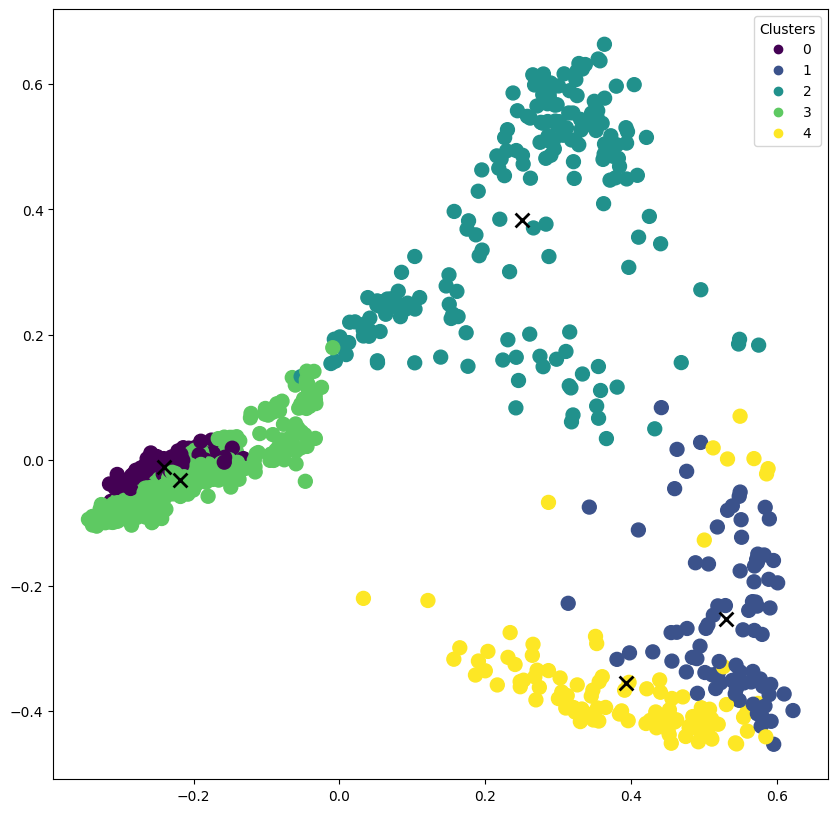

In [35]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [36]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [37]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

### Détection des bigrams

In [38]:
bigram_phrases = Phrases(sentences)

In [39]:
type(bigram_phrases.vocab)

dict

In [40]:
len(bigram_phrases.vocab.keys())

15761694

### Conversion des `Phrases` en objet `Phraser`

In [41]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

### Extraction des trigrams

In [42]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [43]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigrams

In [44]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [45]:
print(corpus[:100])

[['raege', 'quotidien', 'j00', 'exemplaires_distribues', 'gratuitement', '#', 'k', '.', "'", 'dans', 'ilagg', ';', 'lomeration', 'bruxelloise', 'et', '.', 'en_province', '.'], ['i', 'personnes_habitant', 'aux_etages', 'fenile', 'journal_contre', '60', 'c', '"<<', 'par_mois', '.'], ['fspir', 'est', 'expedie', 'en', 'proyinoe', 'contre', 't', '*>>"', 'par_mois', ',', 'payables_par_trimestre', '.'], ['annonces', ',', 'faits_divers', 'et', 'reclames', 'sjont', 'recu', 'frie', 'd', "'", 'isabelle', ';', 'a', 'l', "'", 'agence', 'rossfjl', '.'], ['44', '.'], ['-', 'v', ',', 'et', 'do', 'l', "'", 'enseignement', ',', 'a', 'braxell', 'annonces_remises_avant', 'midi', 'sont', ';', '-', 'a', ";'%", '>', '1', 'v', '>>^.'], [':', 'vv', '*', "*'*", 'hv', '/', 'f', '#-', 'v', '1', 'v', ';', "'", 'y', '>', 'fif', "'", 'ji', 'l', "'", 'h', '-', 'et', '.'], ['jeudi', '22', 'decembre', 'i887', 'observatoire', 'roy', "&'", 'cs', 'io', 'decembre', 's', 'heurts', 'uat', '$', 'r', '-:', 'r', 'quotidien_grat

## Entrainement d'un modèle Word2Vec sur ce corpus

In [81]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=10, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 14min 47s
Wall time: 9min 48s


### Sauver le modèle dans un fichier

### Sauver le modèle dans un fichier

In [82]:
outfile = f"../data/newspapers.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [83]:
model = Word2Vec.load("../data/newspapers.model")

### Calculer la similarité entre deux termes

In [84]:
model.wv.similarity("royaume", "cuisine")

-0.2365351

In [85]:
model.wv.similarity("restaurant", "cuisine")

0.38724485

In [86]:
model.wv.similarity("guerre", "conflit")

0.51689863

### Chercher les mots les plus proches d'un terme donné

In [87]:
model.wv.most_similar("juge", topn=10)

[('tribunal', 0.850292980670929),
 ('jugement', 0.8473289012908936),
 ('ministere_public', 0.8462203145027161),
 ('substitut', 0.841277003288269),
 ('procureur_general', 0.8371985554695129),
 ('serment', 0.8257649540901184),
 ('greffier', 0.8241916298866272),
 ('magistrat', 0.8208627104759216),
 ('prevenu', 0.817538857460022),
 ('procureur_du_roi', 0.8140775561332703)]

In [88]:
model.wv.most_similar("pays", topn=10)

[('pavs', 0.8287361860275269),
 ('marche_commun', 0.8055139183998108),
 ('autres_pays', 0.8001614809036255),
 ('nouvel_etat', 0.7962616682052612),
 ('nos_voisins', 0.7846150994300842),
 ('rapprochement', 0.7637457251548767),
 ('royaume', 0.7502655386924744),
 ('developpement_economique', 0.7498437762260437),
 ('territoires', 0.7471151351928711),
 ('laos', 0.7445126175880432)]

In [89]:
model.wv.most_similar("art", topn=10)

[('art_decoratif', 0.7838917970657349),
 ('antiquite', 0.764816164970398),
 ('art_ancien', 0.7645040154457092),
 ('architecture', 0.7483941316604614),
 ('ethnographie', 0.7471417188644409),
 ('esthetique', 0.7295337915420532),
 ('hygiene', 0.7237748503684998),
 ('optique', 0.718222439289093),
 ('arl', 0.7148783206939697),
 ('art_dramatique', 0.7139120101928711)]